<h1><center>Importing the required libraries:</center></h1>

In [1]:
import shelve
import sys
sys.path.insert(0,'../')
from EquivalentLayer import Spherical
from Models import Single_model
from Plots import plot_mag
import numpy as np

<h1><center>Creating my observers sphere just above some reference radius:</center></h1>

In [2]:
reference_radius = 6371
h_mesure = 4
nobs = 50
obs_theta = np.linspace( np.radians( 0 ), np.radians( 180 ), nobs )
obs_phi = np.linspace( np.radians( -180 ), np.radians( 180 ), nobs )
observers = [ ]
for i in range( nobs ):
    for j in range( nobs ):
        observers.append( [ reference_radius + h_mesure * 1000, obs_theta[ i ], obs_phi[ j ] ] )

<h1><center>Reading my already created model and calculating its magnetic components in the observers sphere:</center></h1>

In [3]:
body = shelve.open('Bodies/100_dip_6000_70_40')['model']
source_components = body.expand( observers )

<h1><center>Creating my Spherical Equivalent Layer in the reference radius:</center></h1>

In [4]:
ntheta = 50
nphi = 50
eqly = Spherical( reference_radius, nphi, ntheta )

<h1><center>Creating my observed data:</center></h1>

In [5]:
data = np.r_[ source_components['Radial'], source_components['Theta'],source_components['Phi'] ]

<h1><center>Fitting my observed data with my equivalent layer:</center></h1>

In [6]:
eqly.fit( observers, data )

C:\Users\Guest1\Documents\Mestrado\EquivalentLayer.py:65: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x = np.array( np.linalg.lstsq( A, b ) )[ 0 ]


<h1><center>Calculating my equivalent layer modeled data:</center></h1>

In [7]:
Layer_components = eqly.expand( observers )

<h1><center>Plotting the data:</center></h1>

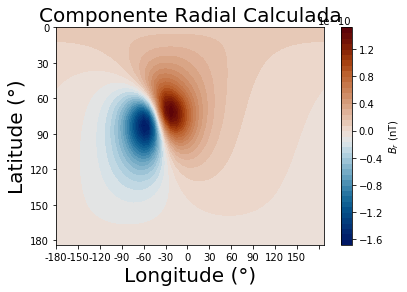

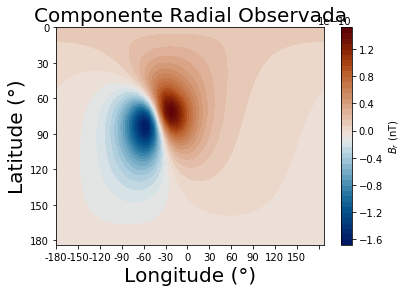

In [8]:
plot_mag( np.reshape( Layer_components.B_r, (nobs, nobs) ), 'Componente Radial Calculada', '$B_r$ (nT)', show = True, save = False )
plot_mag( np.reshape( source_components['Radial'], (nobs, nobs) ), 'Componente Radial Observada', '$B_r$ (nT)', show = True, save = False )

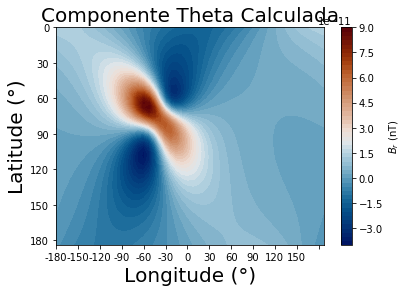

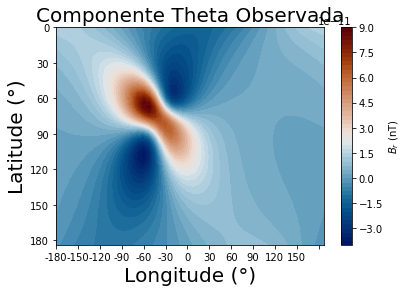

In [9]:
plot_mag( np.reshape( Layer_components.B_theta, (nobs, nobs) ), 'Componente Theta Calculada', '$B_r$ (nT)', show = True, save = False )
plot_mag( np.reshape( source_components['Theta'], (nobs, nobs) ), 'Componente Theta Observada', '$B_r$ (nT)', show = True, save = False )

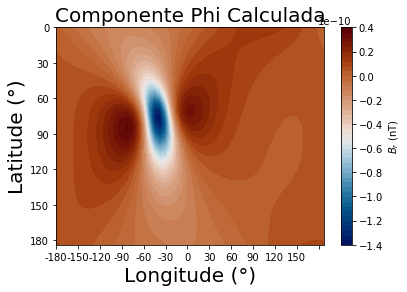

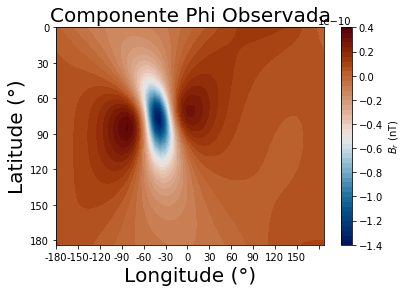

In [10]:
plot_mag( np.reshape( Layer_components.B_phi, (nobs, nobs) ), 'Componente Phi Calculada', '$B_r$ (nT)', show = True, save = False )
plot_mag( np.reshape( source_components['Phi'], (nobs, nobs) ), 'Componente Phi Observada', '$B_r$ (nT)', show = True, save = False )